In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset

In [2]:
#Loading the dataset
cars = pd.read_csv("cars_class.csv")
cars.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


**Description of attributes**
Comp: Compactness,
Circ: Circularity,
D.Circ: Distance Circularity,
Rad.Ra: Radius ratio,
Pr.Axis.Ra: pr.axis aspect ratio,
Max.L.Ra: max.length aspect ratio,
Scat.Ra: scatter ratio,
Elong: elongatedness,
Pr.Axis.Rect: pr.axis rectangularity,
Max.L.Rect: max.length rectangularity,
Sc.Var.Maxis: scaled variance along major axis,
Sc.Var.maxis: scaled variance along minor axis,
Ra.Gyr: scaled radius of gyration,
Skew.Maxis: skewness about major axis,
Skew.maxis: skewness about minor axis,
Kurt.maxis: kurtosis about minor axis,
Kurt.Maxis: kurtosis about major axis,
Holl.Ra: hollows ratio.


# Data Understanding

In [3]:
cars.info()
#summary: There are 716 rows and 20 columns. No null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [4]:
#editing the column names
cars.columns = cars.columns.str.replace('.','_')
cars.head()

,ID,Comp,Circ,D_Circ,Rad_Ra,Pr_Axis_Ra,Max_L_Ra,Scat_Ra,Elong,Pr_Axis_Rect,Max_L_Rect,Sc_Var_Maxis,Sc_Var_maxis,Ra_Gyr,Skew_Maxis,Skew_maxis,Kurt_maxis,Kurt_Maxis,Holl_Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


# Data Cleaning

Lets look into each columns individually if any inconsistent data is present.

In [5]:
cars.Comp.unique()
#Comp column seems good

array([ 88,  85,  91, 102,  87,  95,  97,  96, 107,  86,  89,  92, 104,
        81,  94,  93, 111,  82, 106,  99,  78,  83,  84, 100, 109,  90,
       101,  79, 117,  98, 105, 108,  80, 103, 110, 112,  77, 115, 119,
        73, 114,  76, 113], dtype=int64)

In [6]:
cars.Circ.unique()
# Circ column seems good

array([39, 35, 41, 54, 46, 37, 55, 38, 40, 45, 36, 34, 52, 51, 47, 44, 53,
       43, 57, 50, 42, 59, 48, 56, 33, 58, 49], dtype=int64)

In [7]:
cars.D_Circ.unique()
# D_Circ column seems good

array([ 70,  64,  84,  98,  74,  76,  66,  89,  58,  83,  78, 109,  71,
        53,  82, 103,  59,  68, 100, 101, 104,  63,  69,  77,  96,  92,
        81, 105,  73,  88,  80, 107,  72, 106,  85,  65,  79,  75, 108,
        87,  86,  54, 110,  47,  90,  40,  95,  60,  61,  93,  94, 102,
        62,  91,  52,  44,  57,  55,  51,  49], dtype=int64)

In [8]:
cars.Rad_Ra.unique()
# Rad_Ra column seems good

array([166, 129, 141, 177, 152, 162, 151, 199, 176, 137, 154, 186, 175,
       149, 230, 117, 213, 145, 171, 163, 134, 169, 224, 219, 208, 115,
       127, 142, 153, 188, 194, 143, 183, 164, 225, 180, 140, 207, 133,
       209, 147, 210, 113, 150, 206, 187, 139, 123, 132, 227, 306, 228,
       110, 159, 170, 201, 202, 182, 189, 195, 128, 131, 155, 116, 181,
       172, 197, 119, 173, 121, 231, 135, 220, 204, 130, 126, 111, 203,
       161, 165, 191, 185, 179, 212, 223, 222, 125, 192, 160, 218, 148,
       136, 211, 124, 178, 198, 193, 174, 144, 167, 122, 157, 138, 158,
       146, 196, 168, 322, 156, 221, 190, 120, 205, 184, 214, 215, 252,
       114, 235, 109, 234, 246, 250, 216, 200, 118, 238, 105, 217, 112,
       333, 226], dtype=int64)

In [9]:
cars.Pr_Axis_Ra.unique()
# Pr_Axis_Ra column seems good

array([ 66,  57,  56,  58,  64,  74,  59,  73,  60,  55,  67,  61,  71,
        50,  63,  68,  51,  54,  75,  62,  70,  65, 126,  53,  69,  52,
        97,  48,  72,  49,  47, 133, 103, 105,  76, 102, 138], dtype=int64)

In [10]:
cars.Max_L_Ra.unique()
# Max_L_Ra column seems good

array([ 7,  6,  9, 10, 11,  8,  5, 12,  4, 49,  3, 13, 22, 46,  2, 48, 52,
       25, 55, 43, 19], dtype=int64)

In [11]:
cars.Scat_Ra.unique()
# Scat_Ra column seems good

array([148, 116, 149, 219, 151, 162, 128, 165, 240, 169, 122, 160, 158,
       157, 147, 218, 153, 118, 186, 159, 221, 135, 216, 215, 224, 191,
       142, 138, 146, 139, 188, 220, 133, 168, 154, 197, 155, 156, 227,
       207, 192, 152, 144, 198, 166, 136, 132, 211, 203, 163, 161, 150,
       201, 236, 125, 212, 117, 134, 172, 184, 183, 210, 217, 181, 143,
       213, 164, 127, 225, 112, 123, 206, 177, 171, 208, 241, 126, 209,
       185, 145, 222, 137, 250, 175, 140, 119, 202, 187, 167, 189, 174,
       204, 194, 131, 178, 170, 130, 247, 195, 190, 180, 214, 176, 200,
       193, 226, 205, 257, 252, 262, 196, 114, 239, 115, 120, 199, 129,
       223, 238, 121, 173, 260, 237, 256, 265], dtype=int64)

In [12]:
cars.Elong.unique()
# Elong column seems good

array([44, 57, 45, 31, 42, 52, 39, 27, 54, 41, 30, 35, 43, 51, 47, 49, 48,
       50, 46, 33, 32, 40, 28, 38, 36, 34, 53, 61, 29, 55, 58, 37, 26, 56,
       59], dtype=int64)

In [13]:
cars.Pr_Axis_Rect.unique()
# Pr_Axis_Rect column seems good

array([19, 17, 25, 20, 18, 26, 24, 22, 23, 21, 27, 28, 29], dtype=int64)

In [14]:
cars.Max_L_Rect.unique()
# Max_L_Rect column seems good

array([134, 125, 143, 171, 136, 155, 129, 128, 168, 132, 140, 148, 149,
       174, 145, 160, 172, 159, 146, 173, 170, 178, 130, 131, 122, 139,
       161, 162, 150, 147, 167, 127, 157, 180, 158, 151, 141, 154, 138,
       133, 156, 186, 164, 163, 126, 153, 142, 144, 177, 119, 124, 121,
       166, 176, 152, 137, 165, 169, 175, 123, 135, 182, 179, 120, 188,
       118], dtype=int64)

In [15]:
cars.Sc_Var_Maxis.unique()
# Sc_Var_Maxis column seems good

array([167, 138, 170, 219, 174, 175, 148, 188, 258, 190, 146, 185, 180,
       168, 230, 177, 204, 227, 173, 151, 225, 222, 228, 210, 162, 155,
       158, 165, 159, 206, 247, 153, 193, 226, 171, 214, 166, 234, 223,
       181, 208, 169, 161, 189, 184, 172, 231, 272, 256, 136, 147, 197,
       203, 211, 236, 186, 213, 164, 154, 156, 130, 262, 141, 137, 179,
       217, 235, 202, 200, 176, 232, 196, 199, 182, 265, 229, 160, 149,
       218, 152, 163, 220, 139, 221, 157, 280, 209, 195, 140, 216, 212,
       194, 238, 183, 191, 142, 266, 143, 207, 224, 187, 215, 150, 178,
       275, 237, 269, 285, 144, 134, 241, 240, 264, 135, 192, 145, 205,
       267, 246, 287, 288, 320, 263, 254], dtype=int64)

In [16]:
cars.Sc_Var_maxis.unique()
# Sc_Var_maxis column seems good

array([ 332,  200,  330,  706,  337,  381,  246,  419,  866,  428,  225,
        382,  379,  370,  321,  347,  205,  533,  371,  727,  368,  264,
        336,  686,  679,  737,  543,  299,  274,  364,  284,  319,  289,
        530,  731,  266,  426,  305,  713,  362,  596,  359,  349,  756,
        314,  635,  373,  546,  311,  285,  586,  339,  415,  275,  383,
        260,  663,  318,  625,  732,  404,  374,  611,  346,  833,  352,
        229,  668,  203,  322,  259,  445,  523,  506,  661,  696,  492,
        307,  673,  427,  402,  578,  310,  324,  240,  741,  184,  776,
        221,  348,  197,  325,  712,  367,  631,  677,  711,  326,  622,
        716,  485,  351,  718,  425,  757,  504,  366,  450,  320,  342,
        272,  629,  391,  666,  327,  870,  237,  253,  684,  258,  363,
        671,  335,  524,  389,  583,  607,  406,  707,  653,  220,  701,
        265,  277,  281,  928,  721,  455,  517,  323,  472,  294,  212,
        610,  520,  340,  418,  290,  526,  333,  3

In [17]:
cars.Ra_Gyr.unique()
# Ra_Gyr column seems good

array([143, 123, 158, 223, 140, 172, 112, 136, 245, 148, 150, 184, 169,
       134, 226, 190, 138, 182, 189, 201, 176, 186, 220, 214, 213, 146,
       162, 188, 120, 137, 205, 209, 127, 171, 202, 132, 173, 149, 181,
       174, 191, 179, 175, 155, 121, 145, 219, 218, 200, 253, 199, 128,
       139, 152, 183, 230, 216, 217, 130, 195, 177, 192, 204, 164, 126,
       193, 119, 246, 178, 142, 151, 159, 185, 153, 187, 247, 168, 133,
       180, 157, 234, 135, 124, 198, 211, 224, 197, 239, 154, 141, 222,
       160, 129, 167, 229, 170, 206, 144, 210, 156, 196, 240, 163, 166,
       242, 235, 212, 194, 161, 203, 236, 250, 125, 215, 244, 117, 165,
       260, 114, 221, 208, 228, 131, 147, 232, 113, 231, 261, 262, 249,
       118, 115, 109, 238, 116, 237, 207, 255], dtype=int64)

In [18]:
cars.Skew_Maxis.unique()
# Skew_Maxis column seems good

array([ 69,  65,  72,  70,  74,  66,  80,  67,  63,  71,  73,  64,  85,
        77,  82,  75,  68,  62,  81,  78, 118,  76,  89,  83,  86,  79,
        87,  91,  84,  61,  90,  97,  59, 119, 127,  88,  99,  60, 135],
      dtype=int64)

In [19]:
cars.Skew_maxis.unique()
# Skew_maxis column seems good

array([ 5,  1,  9,  8,  6,  3,  7, 10, 16,  4,  2, 15, 11,  0, 14, 12, 13,
       21, 19, 17, 20, 18, 22], dtype=int64)

In [20]:
cars.Kurt_maxis.unique()
# Kurt_maxis column seems good

array([13, 23, 14, 17, 33,  4,  2,  3,  1,  5, 11, 12, 24, 22, 15,  6, 20,
        0, 29, 28, 21,  8,  7, 10, 19, 18,  9, 32, 16, 27, 25, 26, 38, 36,
       30, 35, 41, 31], dtype=int64)

In [21]:
cars.Kurt_Maxis.unique()
# Kurt_Maxis column seems good

array([193, 196, 189, 186, 187, 184, 195, 199, 198, 197, 191, 182, 180,
       183, 190, 179, 185, 181, 204, 201, 188, 194, 192, 177, 178, 200,
       203, 202, 176], dtype=int64)

In [22]:
cars.Holl_Ra.unique()
# Holl_Ra column seems good

array([201, 203, 199, 196, 193, 200, 184, 202, 206, 191, 197, 187, 183,
       198, 194, 185, 189, 195, 190, 210, 209, 186, 204, 207, 188, 208,
       205, 192, 182, 211, 181], dtype=int64)

In [23]:
cars.Class.unique()
# Class column seems good

array([0, 3, 1, 2], dtype=int64)

The dataset looks fine. Now we can visulaize the data to understand better

# Data Visualization

In [24]:
cor = cars.corr()
cor

,ID,Comp,Circ,D_Circ,Rad_Ra,Pr_Axis_Ra,Max_L_Ra,Scat_Ra,Elong,Pr_Axis_Rect,Max_L_Rect,Sc_Var_Maxis,Sc_Var_maxis,Ra_Gyr,Skew_Maxis,Skew_maxis,Kurt_maxis,Kurt_Maxis,Holl_Ra,Class
ID,1.000000,0.043776,0.017917,-0.000686,0.017955,0.016032,-0.001560,0.014859,-0.006429,0.016642,0.016799,0.022318,0.020176,0.004570,0.019601,-0.008888,-0.041922,0.029385,0.006687,-0.033656
Comp,0.043776,1.000000,0.685515,0.782416,0.681598,0.098000,0.120446,0.807686,-0.784352,0.808425,0.669999,0.756467,0.813816,0.584643,-0.249420,0.213224,0.136192,0.315362,0.370891,-0.015112
Circ,0.017917,0.685515,1.000000,0.799001,0.621623,0.156770,0.234471,0.860339,-0.828911,0.857357,0.965119,0.803929,0.851841,0.938749,0.053117,0.137134,-0.041619,-0.103991,0.050379,-0.171417
D_Circ,-0.000686,0.782416,0.799001,1.000000,0.764652,0.168777,0.240817,0.905598,-0.910257,0.894926,0.773701,0.858005,0.887997,0.715118,-0.227167,0.118065,0.240566,0.155967,0.342472,-0.070422
Rad_Ra,0.017955,0.681598,0.621623,0.764652,1.000000,0.679403,0.447076,0.736257,-0.788814,0.708706,0.565054,0.805961,0.725038,0.549433,-0.137810,0.053169,0.154588,0.382966,0.463067,-0.198390
Pr_Axis_Ra,0.016032,0.098000,0.156770,0.168777,0.679403,1.000000,0.669598,0.117125,-0.193680,0.089976,0.134261,0.305815,0.104121,0.137493,0.208299,-0.054422,-0.035425,0.228666,0.257122,-0.110222
Max_L_Ra,-0.001560,0.120446,0.234471,0.240817,0.447076,0.669598,1.000000,0.146370,-0.157702,0.142009,0.291938,0.319976,0.125102,0.188278,0.348971,0.009765,0.018541,-0.045766,0.123778,0.190215
Scat_Ra,0.014859,0.807686,0.860339,0.905598,0.736257,0.117125,0.146370,1.000000,-0.973523,0.991787,0.809629,0.945460,0.996412,0.804632,-0.033373,0.068231,0.191242,0.021518,0.131811,-0.289056
Elong,-0.006429,-0.784352,-0.828911,-0.910257,-0.788814,-0.193680,-0.157702,-0.973523,1.000000,-0.949891,-0.773279,-0.932824,-0.957282,-0.771836,0.106339,-0.053248,-0.165277,-0.131054,-0.230072,0.338634
Pr_Axis_Rect,0.016642,0.808425,0.857357,0.894926,0.708706,0.089976,0.142009,0.991787,-0.949891,1.000000,0.812405,0.931380,0.992075,0.801218,-0.022921,0.074895,0.194278,-0.006111,0.109542,-0.254703


<AxesSubplot:>

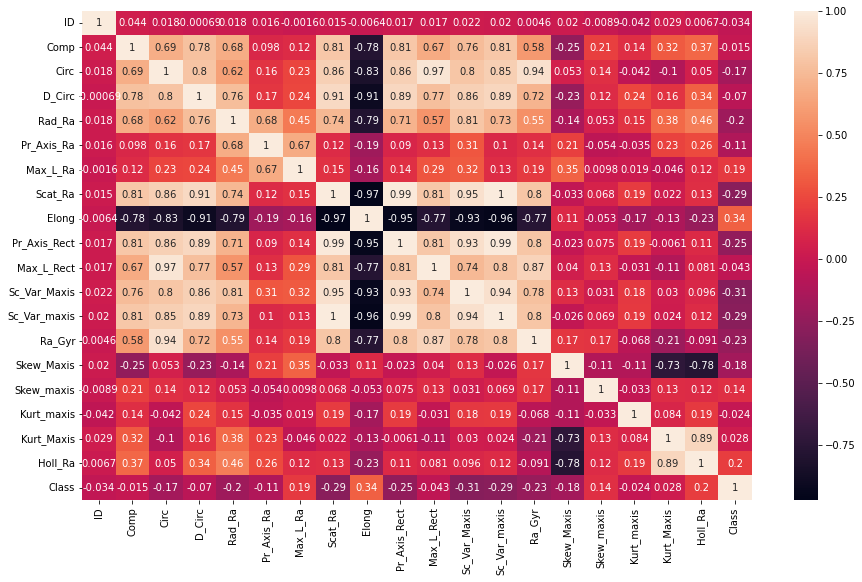

In [25]:
# plotting correlations on a heatmap

#figure size
plt.figure(figsize=(15,9))

#heatmap
sns.heatmap(cor, cmap="rocket", annot= True)

<AxesSubplot:>

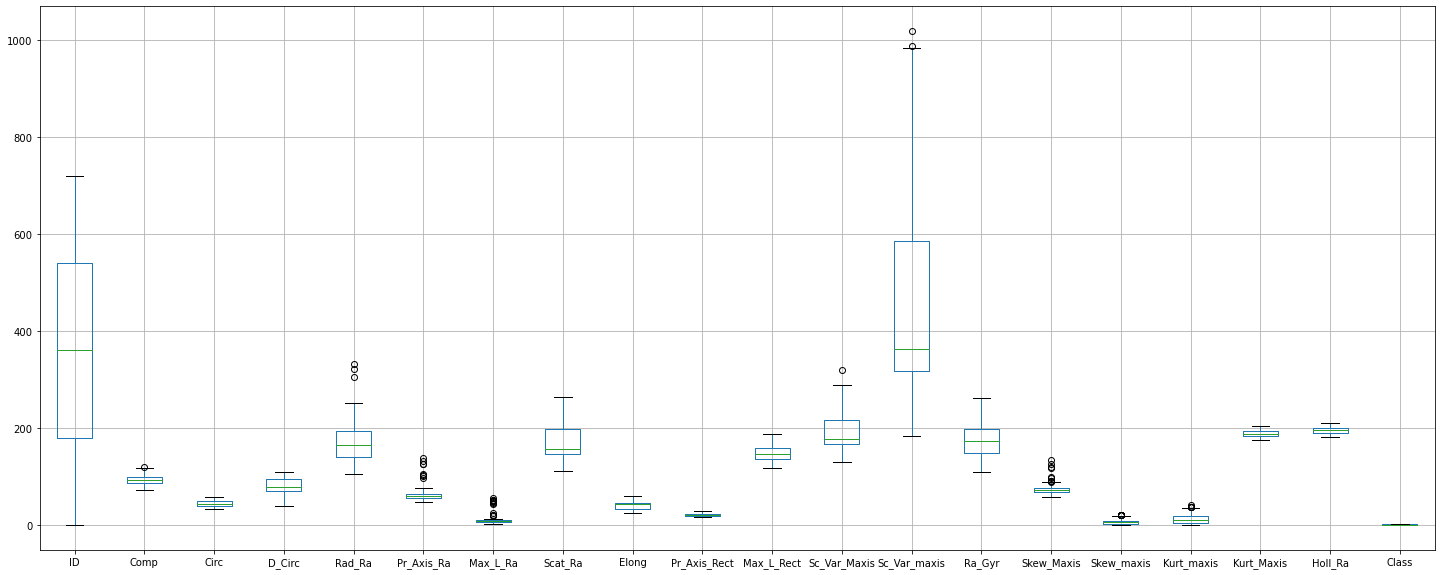

In [26]:
plt.figure(figsize=(25,10))
cars.boxplot()

In [27]:
cars.columns

Index(['ID', 'Comp', 'Circ', 'D_Circ', 'Rad_Ra', 'Pr_Axis_Ra', 'Max_L_Ra',
       'Scat_Ra', 'Elong', 'Pr_Axis_Rect', 'Max_L_Rect', 'Sc_Var_Maxis',
       'Sc_Var_maxis', 'Ra_Gyr', 'Skew_Maxis', 'Skew_maxis', 'Kurt_maxis',
       'Kurt_Maxis', 'Holl_Ra', 'Class'],
      dtype='object')

## Splitting the dataset

In [28]:
X = cars.drop("Class", axis=1)
y = cars["Class"]

In [29]:
X.head()

,ID,Comp,Circ,D_Circ,Rad_Ra,Pr_Axis_Ra,Max_L_Ra,Scat_Ra,Elong,Pr_Axis_Rect,Max_L_Rect,Sc_Var_Maxis,Sc_Var_maxis,Ra_Gyr,Skew_Maxis,Skew_maxis,Kurt_maxis,Kurt_Maxis,Holl_Ra
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

M_df = {}
#split into train and test
def model_val(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
# cross validation to evaluate the model    
    cv = cross_val_score(model, X, y, cv=10)
    print(f"{model} avg cross val score is {np.mean(cv)}")
    M_df[model] = round(np.mean(cv)*100,2)

## Model Building

In [31]:
#importing logistic regression from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#initiating the instance
model = LogisticRegression()

#calling the model_val
model_val(model,X,y)

LogisticRegression() accuracy is 0.6319444444444444
LogisticRegression() avg cross val score is 0.7024061032863849


In [32]:
#importing svm from scikit learn
from sklearn import svm

#initiating the instance
model = svm.SVC()

#calling the model_val
model_val(model,X,y)

SVC() accuracy is 0.3819444444444444
SVC() avg cross val score is 0.44925665101721435


In [33]:
#importing Random Forest Classifier from scikit learn
from sklearn.ensemble import RandomForestClassifier

#initiating the instance
model = RandomForestClassifier()

#calling the model_val
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7152777777777778
RandomForestClassifier() avg cross val score is 0.7455594679186228


## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = st.fit_transform(X)

In [35]:
X.shape

(719, 19)

In [36]:
from sklearn.decomposition import PCA

#Based on the plot, we will select 10 components
pca = PCA(n_components=10)
pca.fit(X)

#Assign the components to the X variable
X_pca = pca.transform(X)
X_pca

array([[-2.06654196, -1.48232522,  0.4702364 , ..., -0.2164705 ,
         0.04302561,  0.0868139 ],
       [-4.75867548, -2.33415942, -0.30396157, ...,  0.0184468 ,
        -0.57695842,  0.23691357],
       [-1.56509571, -0.51081373, -0.37090154, ...,  0.42426027,
         0.19609049,  0.14400489],
       ...,
       [-2.59873527, -1.99351029, -0.35003383, ..., -0.20229619,
        -0.26363373,  0.49846801],
       [ 4.74757021,  0.48945456,  0.80917616, ..., -0.5756592 ,
         0.11362471, -0.55175821],
       [-0.67295175, -2.43229428,  0.439591  , ...,  0.3132691 ,
        -0.72576457,  0.32925657]])

In [37]:
X_pca.shape

(719, 10)

**Logistic Regression**

In [38]:
#initiating the instance
model = LogisticRegression()

#calling the model_val
model_val(model,X_pca,y)

LogisticRegression() accuracy is 0.7152777777777778
LogisticRegression() avg cross val score is 0.7148669796557121


**Support Vector Classifier**

In [39]:
#initiating the instance
model = svm.SVC()

#calling the model_val
model_val(model,X_pca,y)

SVC() accuracy is 0.7083333333333334
SVC() avg cross val score is 0.7357785602503912


**Random Forest Classifier**

In [40]:
#initiating the instance
model = RandomForestClassifier()

#calling the model_val
model_val(model,X_pca,y)

RandomForestClassifier() accuracy is 0.7638888888888888
RandomForestClassifier() avg cross val score is 0.7593505477308294


In [41]:
M_df

{LogisticRegression(): 70.24,
 SVC(): 44.93,
 RandomForestClassifier(): 74.56,
 LogisticRegression(): 71.49,
 SVC(): 73.58,
 RandomForestClassifier(): 75.94}

We can see that after feature scaling and dimensionality reduction the accuary of the logistic regression and SVC is increased.

**Hyperparameter Tuning**

In [42]:
from sklearn.model_selection import RandomizedSearchCV

**Logistic Regression**

In [43]:
L_pm = {"C":np.logspace(-4,4,20), "solver":['liblinear']}

Rand_Log = RandomizedSearchCV(LogisticRegression(), param_distributions = L_pm, n_iter=20, cv=10, verbose = True)

Rand_Log.fit(X_pca,y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
Rand_Log.best_score_

0.717605633802817

In [45]:
Rand_Log.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

**Support Vector Classifier**

In [46]:
S_pm = {'C': [0.2, 0.7, 0.5, 1], 'kernel': ['linear']}

Rand_SVC = RandomizedSearchCV(svm.SVC(), param_distributions = S_pm, n_iter=20, cv=10, verbose = True)

Rand_SVC.fit(X_pca,y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.2, 0.7, 0.5, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [47]:
Rand_SVC.best_score_

0.7356611893583725

In [48]:
Rand_SVC.best_params_

{'kernel': 'linear', 'C': 0.5}

In [49]:
R_pm = {"n_estimators":np.arange(10,1000,10), "max_depth": [None,3,5], "max_features": ['auto','sqrt'], 
        "min_samples_leaf": [1,2,5,10]}

Rand_RF = RandomizedSearchCV(RandomForestClassifier(), param_distributions = R_pm, n_iter=20, cv=10, verbose = True)

Rand_RF.fit(X_pca,y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [50]:
Rand_RF.best_score_

0.7454616588419405

In [51]:
Rand_RF.best_params_

{'n_estimators': 410,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

## Finalizing the Model

In [52]:
RF = RandomForestClassifier(n_estimators= 420,min_samples_leaf= 2,max_features='auto',max_depth= None)
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34,  0,  0,  1],
       [ 1, 20, 18,  1],
       [ 2, 10, 20,  2],
       [ 1,  0,  0, 34]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred)

0.75

In [60]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average= "weighted")

0.7427188277644898